In [3]:
import astropy.io.ascii as ascii
import Functions as AC
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

Question #1

In [1]:
def f(x, tau):
    if x < 0:
        return 0
    else:
        return (1/tau)*np.exp(-x/tau)
    
    
def cdf(x, tau):
    if x < 0:
        return 0
    else:
        return (1-np.exp(-x/tau))

In [12]:
def expected_value(tau):
    integrand = lambda x: x * f(x, tau)
    result, _ = quad(integrand, 0, np.inf)
    return result

tau = 1
E_X = expected_value(tau)
print(f"E[X] = {E_X:.4f}")

E[X] = 1.0000


$E_{X}$ = $\tau$

$E_{X}^2$ = $\tau^{2}$

In [15]:
E_X2 = 2*tau**2
Var = E_X2 - (E_X)**2
Var

1.0000000000000004

In [16]:
def Quantile(tau, p):
    return (-tau*np.log(1-p))

In [17]:
mean = Quantile(tau, .5)
ten_percent = Quantile(tau, .1)
ninety_percent = Quantile(tau, .9)

print(mean, ten_percent, ninety_percent)

0.6931471805599453 0.10536051565782628 2.302585092994046


Question #2

In [25]:
def pdf(i):
    if i < 0:
        return 0
    elif 0 <= i <= np.pi/2:
        return np.sin(i)
    else: 
        return 0
    
def cdf(i):
    if i < 0:
        return 0
    elif 0 <= i <= np.pi/2:
        return 1-np.cos(i)
    else: 
        return 0

In [29]:
print(cdf(i=.261799)-cdf(i=0))

print(cdf(i=np.pi/2)-cdf(i=1.309))

0.03407407334119883
0.258816088398246


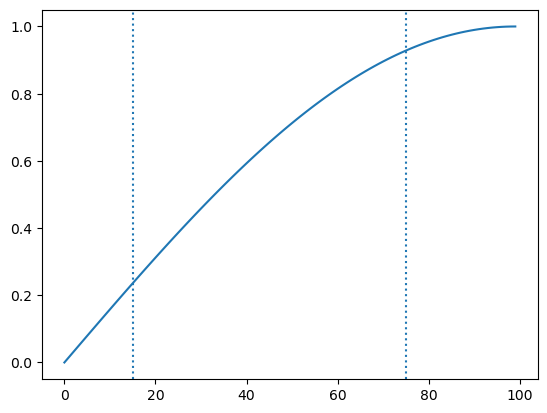

In [35]:
x = np.linspace(0, np.pi/2, 100)
plt.plot(np.sin(x))
plt.axvline(15, linestyle=':')
plt.axvline(75, linestyle=':')

Question #3

In [52]:
column_1 = [[0.25],[-0.1]]
column_2 = [[-0.1], [4]]
Cov = np.hstack((column_1, column_2))
print(Cov)

[[ 0.25 -0.1 ]
 [-0.1   4.  ]]


In [55]:
sigma1=np.sqrt(Cov[0][0])
sigma2=np.sqrt(Cov[1][1])
Correlation = Cov[0][1]/(sigma1*sigma2)
print(sigma1)
print(sigma2)
print(Correlation) 

0.5
2.0
-0.1


Question #4

In [64]:
V1 = 14.92
V1e = 0.05
V2 = 15.02
V2e = 0.08

v = np.array([V1, V2])
ve = np.array([V1e, V2e])

Vave = (V1+V2)/2
Vave_e = np.sqrt((V1e**2+V2e**2))/2

w = 1 / ve**2
mean_weight = np.sum(w*v)/np.sum(w)
err_weight = 1/np.sqrt(np.sum(w))

print(f"Plain mean:     {Vave:.3f} ± {Vave_e:.3f}")
print(f"Weighted mean:  {mean_weight:.3f} ± {err_weight:.3f}")

Plain mean:     14.970 ± 0.047
Weighted mean:  14.948 ± 0.042


Choose the weighted mean as it gives more weight towards the more precise measurement (Vq, V1e)

Question #5

In [77]:
col_1 = [[3],[12]]
col_2 = [[4],[-5]]
A = np.hstack((col_1, col_2))
print(A)
N = 1_000_000
u = np.random.normal(0, 1, size=(2, N))

E_u = np.array([[0, 0]]).T

Cov_u = np.identity(2)
print(E_u)


[[ 3  4]
 [12 -5]]
[[0]
 [0]]


In [85]:
x = A @ u

# Expectations of x
E_x = np.mean(x, axis=1)

# Covariance of x
C_x = np.cov(x)
std_x1 = np.sqrt(C_x[0][0])
std_x2 = np.sqrt(C_x[1][1])
# Cov_x12 = np.cov(x[0], x[1])

print("E[x] =\n", E_x)
print("Cov(x) =\n", C_x)

print(std_x1, std_x2)


E[x] =
 [-0.00630296  0.00783771]
Cov(x) =
 [[ 25.0050801   15.99548444]
 [ 15.99548444 168.93896595]]
5.000507983805906 12.997652324602248


Question #6

In [ ]:
# Only symmetric and square matrices can be covariance matrices
# A, B, D, E, F, and G are square
A = np.array([[-4,  -0.5],
              [-0.5,  9]])

B = np.array([[ 4,  -0.5],
              [-0.5,  9]])

D = np.array([[ 4,   0.5,  0.1],
              [-0.5, 9,    1],
              [-0.1, -1,   3]])

E = np.array([[ 4,   0,   0],
              [-0.5, 9,   0],
              [-0.1, -1,  3]])

F = np.array([[1,   2.5],
              [2.5, 1]])

G = np.array([[ 4,    0.25, -0.9],
              [ 0.25, 9,     0.16],
              [-0.9,  0.16, 16]])

print("A is " + str(np.equal(A.T, A)))
print("B is " + str(np.equal(B.T, B)))
print("D is " + str(np.equal(D.T, D)))
print("E is " + str(np.equal(E.T, E)))
print("F is " + str(np.equal(F.T, F)))
print("G is " + str(np.equal(G.T, G)))


A is [[ True  True]
 [ True  True]]
B is [[ True  True]
 [ True  True]]
D is [[ True False False]
 [False  True False]
 [False False  True]]
E is [[ True False False]
 [False  True False]
 [False False  True]]
F is [[ True  True]
 [ True  True]]
G is [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


So A, B, F, and G could be covariance matrices

Question #7

In [100]:
y = np.array([12, 14])


Cov = np.array([[0.16, -0.14],
              [-0.14, 0.49]])

y1_err = np.sqrt(Cov[0][0])
y2_err = np.sqrt(Cov[1][1])

Corr = Cov/(y1_err*y2_err)
print(y1_err, y2_err, Corr)

0.4 0.7 [[ 0.57142857 -0.5       ]
 [-0.5         1.75      ]]


In [102]:


y = np.array([12.0, 14.0]).reshape(-1,1)
X = np.array([[1.0],[1.0]])

covs = {
    "neg_corr": np.array([[0.16, -0.14],
                          [-0.14, 0.49]]),
    "uncorr":   np.array([[0.16,  0.00],
                          [0.00,  0.49]]),
    "pos_corr": np.array([[0.16,  0.14],
                          [0.14,  0.49]])
}

def analyze(S):
    sig = np.sqrt(np.diag(S))                      # uncertainties of y
    R = np.diag(1/sig) @ S @ np.diag(1/sig)        # correlation matrix
    detS = np.linalg.det(S)
    Sinv = np.linalg.inv(S)
    Ca = np.linalg.inv(X.T @ Sinv @ X)             # variance of mu-hat (1x1)
    mu_hat = (Ca @ X.T @ Sinv @ y)[0,0]            # GLS estimate
    sigma_mu = np.sqrt(Ca[0,0])
    return sig, R, detS, Sinv, mu_hat, sigma_mu, Ca

for name, S in covs.items():
    sig, R, detS, Sinv, mu_hat, sigma_mu, Ca = analyze(S)
    print(f"\n== {name} ==")
    print("sigmas(y):", sig)
    print("R:\n", R)
    print("|Sigma| =", detS)
    print("Sigma^{-1}:\n", Sinv)
    print(f"mu_hat = {mu_hat:.6f},  sigma_mu = {sigma_mu:.6f}  (Var={Ca[0,0]:.8f})")



== neg_corr ==
sigmas(y): [0.4 0.7]
R:
 [[ 1.  -0.5]
 [-0.5  1. ]]
|Sigma| = 0.0588
Sigma^{-1}:
 [[8.33333333 2.38095238]
 [2.38095238 2.72108844]]
mu_hat = 12.645161,  sigma_mu = 0.251447  (Var=0.06322581)

== uncorr ==
sigmas(y): [0.4 0.7]
R:
 [[1. 0.]
 [0. 1.]]
|Sigma| = 0.07839999999999998
Sigma^{-1}:
 [[6.25       0.        ]
 [0.         2.04081633]]
mu_hat = 12.492308,  sigma_mu = 0.347297  (Var=0.12061538)

== pos_corr ==
sigmas(y): [0.4 0.7]
R:
 [[1.  0.5]
 [0.5 1. ]]
|Sigma| = 0.0588
Sigma^{-1}:
 [[ 8.33333333 -2.38095238]
 [-2.38095238  2.72108844]]
mu_hat = 12.108108,  sigma_mu = 0.398646  (Var=0.15891892)


A seems like Y is maybe independent of X (0)
B seems like Y and X are dependent (0)
C seems like Y and X are independent (0)
D seems like X is maybe independent of Y (0)
E seems like Y and X are dependent (0)
F seems like Y and X are dependent (-)
G seems like Y and X are dependent (-)
H seems like Y and X are dependent (+)